# Examples  N = 6 (2,2,2)

$ D_{N_1,N_2,N3} \in \mathcal E_N $

In [3]:
N=6
N1=2
N2=2
N3=2
nD=2*N/gcd(gcd(N1+N2,N2+N3),N1+N3)
print(nD)
n=nD



3


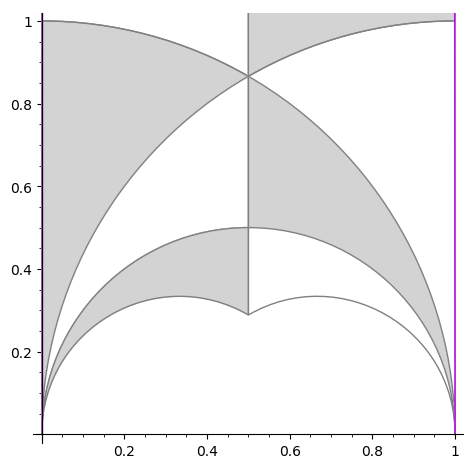

In [4]:
Gamma1E=Gamma1(n).to_even_subgroup() #Even group containing Gamma1(N), e.g Gamma1[N]
FareySymbol(Gamma1E).fundamental_domain(show_pairing=true)

In [5]:
L0 = list(Gamma1E.coset_reps()) # List of coset representatives of Gamma1[N] in SL2Z
print(L0)
print(' ')
print('Example : ')
a,b=L0[3][1,1],L0[3][1,0] # a , b = D , C 
print(a,b)
r=len(L0) # Weight of Theta . If N>4 then 12 | r and Theta_N / Delta^r/12 is a modular function
print('Theta modular form of weight '+ str(r))

[[1 0]
[0 1], [ 0 -1]
[ 1  0], [1 0]
[1 1], [ 0 -1]
[ 1  2]]
 
Example : 
(2, 1)
Theta modular form of weight 4


$r$ is the weight of Theta. If $n>4$ then $12 | r $ and $\Theta_n / \Delta^{r/12}$ is a modular function, regular on $\mathbb H$ and with a pole of order $d=r/12$ at $i\infty$ if $N$ is even and $d=r/12-1/2 \phi ( n/2)$ if $n$ is odd. 
One have then 
$$
\Theta_n / \Delta^{r/12} = P_n ( J ( \tau ) ) \in \mathbb C [J]
$$

In [6]:
SE=Gamma1E.as_permutation_group()
print('Action of U = [[1, 1 ],[0 , 1]] on the cosets of Gamma1E :')
Sigma=Permutation(SE.L())
U=SE.L()
U ## action of U = [1, 1 , 0 , 1] on the cosets of Gamma1E

Action of U = [[1, 1 ],[0 , 1]] on the cosets of Gamma1E :


(2,3,4)

$$ SL_2 = \bigcup_i \Gamma_1 [ N ] M_i = \bigcup_i ( \Gamma_1 (N) M_i \cup - \Gamma_1 (N) M_i ) $$ 
$$ \Gamma_1 ( N ) M_i M = \chi_i ( M  ) \Gamma_1 ( N ) M_{\sigma_M (i )}  $$
$$ \Psi_N : M \in  SL_2 (\mathbb Z )  \longmapsto \prod_i \chi_i ( M ) \in \mathbb Z / 2 \mathbb Z $$

Is $\Psi_N$ trivial ? 
For each $i$ you have to know if $ \Gamma_1(N)  M_iU =  \Gamma_1(N)M_{\sigma_U (i )} $ or $\Gamma_1(N) M_iU = -\Gamma_1(N)M_{\sigma_U (i )} $ so it is enough to reduce $M_iU$ modulo $\Gamma_1(N)M_{\sigma_U (i )}$.
$$ \chi_i ( M ) = M_i M  M_{\sigma_U (i )}  ^{-1} \text{ mod } \Gamma_1(N) $$

In [7]:
psi = 0
for i in range(len(L0)):
    print(L0[i]*matrix([[1, 1] ,[0 , 1]])*~L0[U(i+1)-1])
    bool=L0[i]*matrix([[1, 1] ,[0 , 1]])*~L0[U(i+1)-1] in Gamma1(N)
    print(bool)
    psi = psi + 0 if bool else psi + 1
    
psi=psi%2
result='$$\Psi_N $$ is trivial' if psi==0 else '$$\Psi_N $$ is not trivial'

print(result)


[ 1  1]
[-1  0]
False
[ 0 -1]
[ 1  1]
False
[-1  1]
[-2  1]
False
[ 1  0]
[-1  1]
False
$$\Psi_N $$ is trivial


If $\Psi_N$ is trivial, then there exists a constant $c_N$ such that the coefficients of $c_N \Theta_N$ are rationnal numbers. 

$$ 
F_{a,b} = \frac{1}{i\pi} \left ( n \zeta ( a/n + \tau b/n) - 2 a \zeta ( 1/2 ) - 2 b \zeta ( \tau / 2 ) \right )
$$

$$
F_m   = F_{0,m} = \frac{1}{i\pi} \left ( n \zeta (\tau m/n) - 2 m \zeta ( \tau / 2 ) \right )
$$

$$ 
\zeta ( z ) = \frac{\sigma ' ( z) }{\sigma ( z ) }
$$

$$
\Theta_N ( \tau ) = \prod_i F_1 ( \tau )_{|[M_i]_1} 
$$

Developpement in Puiseux serie :
$$
F_m ( \tau ) = -i n \sum_{k\geq 0} c_k q^k
$$
$$
c_0 = \mathrm{cotg}(\pi m / n ) \qquad c_k = 4 \sum_{d|k} \sin ( 2 \pi md / n )
$$

$$ {F_1}_{|[M]_1} = F_{D,C} $$

We have a expresion in Pusieux series for $F_{a,b}$
$$
F_{a,b}(p=q^{1/n})=
n\frac{\alpha p^b +1}{\alpha p^b -1 } - 2n \sum_{m>0} \frac{\alpha p^{mn+b}}{1 - \alpha p^{mn+b}} + 2 n \sum_{m>0} \frac{ \alpha^{-1} p^{mn-b} }{1 - \alpha ^{-1} p^{mn-b}} + 2 b 
$$
that we will troncate to compute the $J$ invariant for $a,b$.  

If 
$$ M = \left ( \begin{matrix} A & B \\ C & D \end{matrix} \right)
$$
then 
$$
{F_1}_{|[M]_1} = F_{D,C} 
$$

In [8]:
F=[]

order = 2*n +1 

K.<z> = CyclotomicField(n)
R.<p> = PowerSeriesRing(K,order)


In [9]:
for i in range(len(L0)):
    a,b=L0[i][1,1],L0[i][1,0] #It is a trap !
    alpha = z^a  # exp(2*pi*I*a/n)
    Fab = n * ((alpha*(p^b) +1 )/(alpha*(p^b) - 1))
    M = 2*abs(b)+order # Troncation 
    Fab +=  - 2 * n * sum([alpha* ((p^(m*n+b)) / ( 1 - alpha* (p^(m*n+b)))) for m in range(1,M)]) + 2 * n *  sum([alpha^(-1)*((p^(m*n-b)) / ( 1 - alpha^(-1) *(p^(m*n-b)))) for m in range(1,M)])  
    Fab+= 2 * b 
    print('F'+'_'+str(a)+','+str(b)+' ='+str(Fab))
    print(' ')
    F.append(Fab)

F_1,0 =-2*z - 1 + (-12*z - 6)*p^3 + (-12*z - 6)*p^9 + (-12*z - 6)*p^12 + (-12*z - 6)*p^21 + O(p^23)
 
F_0,1 =-1 - 6*p - 6*p^3 - 6*p^4 - 12*p^7 - 6*p^9 - 6*p^12 - 12*p^13 - 6*p^16 - 12*p^19 + O(p^20)
 
F_1,1 =-1 - 6*z*p - 6*p^3 - 6*z*p^4 - 12*z*p^7 - 6*p^9 - 6*p^12 - 12*z*p^13 - 6*z*p^16 - 12*z*p^19 + O(p^20)
 
F_2,1 =-1 + (6*z + 6)*p - 6*p^3 + (6*z + 6)*p^4 + (12*z + 12)*p^7 - 6*p^9 - 6*p^12 + (12*z + 12)*p^13 + (6*z + 6)*p^16 + (12*z + 12)*p^19 + O(p^20)
 


In [10]:
Theta = prod(F)

print('Theta_n(p) = ')
print(Theta)
#print('Theta(0)='+str(Theta(0).real())+'+'+str(Theta(0).imag())+'i')



Theta_n(p) = 
2*z + 1 + (480*z + 240)*p^3 + (4320*z + 2160)*p^6 + (13440*z + 6720)*p^9 + (35040*z + 17520)*p^12 + (60480*z + 30240)*p^15 + (120960*z + 60480)*p^18 + O(p^20)


Recall that
$$
J=1728g_2^3/\Delta
$$
and
$$
\Delta = g_2^3 - 27g_3^2 
$$
We will use the $q$-expansion formulas 
$$
G_4(\tau ) = \frac{\pi ^4 }{45} \left ( 1 + 240 \sum_{n'>0} \sigma_3(n')q^{n'} \right )
$$
$$
G_6(\tau) = \frac{2\pi^6}{945} \left ( 1 - 504 \sum_{n'>0} \sigma_5(n')q^{n'} \right )
$$
where 
$$ g_2 = 60 G_4 \qquad g_3 = 140G_6 $$

In the case $N=4$, $n_D=8$, we have 
$$ 
\Delta^2 J = 1728g_2^3 ( g_2^3-27g_3^2)
$$

In [11]:
orderq=order/n+1

order = 2*n+1

#L.<a,J0,J1> = PowerSeriesRing(K)
L = PolynomialRing(K,'J0')
L.inject_variables()

Rq.<q> = PowerSeriesRing(L,orderq)

#G4_ = G4 / pi^4
G4_=1/45*(1+240*sum([ sum([d^3 for d in divisors(m)])*q^(m) for m in range(1,2*orderq) ])) 

g2_=60*G4_

#G6_ = G6 / pi ^6 
G6_=2/945*(1-504*sum([ sum([d^5 for d in divisors(m)])*q^(m) for m in range(1,2*orderq) ]))

g3_=140*G6_

#Delta_ = Delta / pi^12
Delta_ = g2_^3 - 27*g3_^2

J = 1728*g2_^3/Delta_





Defining J0


In [12]:
Delta_

4096*q - 98304*q^2 + 1032192*q^3 - 6029312*q^4 + 19783680*q^5 - 44441600*q^6 + 9380642816*q^7 + 313574035456*q^8 + 2585469304832*q^9 + 12514729279488*q^10 + 42215276544000*q^11 + 77428588544000*q^12 + 109705494528000*q^13 + 113929224192000*q^14 + 65548320768000*q^15

In [15]:
J

q^-1 + 744 + 196884*q + 21493760*q^2 + 864299970*q^3 + 20245861058*q^4 + 333203840156*q^5 + 4251116142383*q^6 + 44215060193016*q^7 + 329945462285100*q^8 - 2099262521102076*q^9 - 212054773170461172*q^10 - 7168345735033216940*q^11 - 173696724566130337168*q^12 - 3368935820304475853431*q^13 - 54700837197673727645108*q^14 - 752397794512464868265076*q^15 - 8218512042214091364417100*q^16 - 41349881263653954118534170*q^17 + 1281277953048913031420741558*q^18 + O(q^19)

In [18]:
# Change of variable p^n = q 

T_c=Theta.coefficients()
T_e=Theta.exponents()

Thetaq=sum([T_c[i]*q^(T_e[i]/n) for i in range(len(T_c))])
print('Theta_n(q) = ')
print(Thetaq)
Thetaq.base_ring()

Theta_n(q) = 
2*z + 1 + (480*z + 240)*q + (4320*z + 2160)*q^2 + (13440*z + 6720)*q^3 + (35040*z + 17520)*q^4 + (60480*z + 30240)*q^5 + (120960*z + 60480)*q^6


Univariate Polynomial Ring in J0 over Cyclotomic Field of order 3 and degree 2

In [20]:
P=Thetaq/(Delta_^(r/12)); P

ValueError: power series valuation is not a multiple of 3

In [22]:
P.exponents()

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [23]:
a*((Delta_^(r/12))*(J-J0)).coefficients()[0]

94208

In [24]:
Thetaq

2430*z^3 + 2430*z^2 + 1215 + (1544800*z^3 + 1544800*z^2 + 772400)*q + (440565600*z^3 + 440565600*z^2 + 220282800)*q^2 + (41147971200*z^3 + 41147971200*z^2 + 20573985600)*q^3

In [25]:
Q=((Delta_^(r/12))*(J-J0)); Q

4096 + (-4096*J0 + 2949120)*q + (98304*J0 + 734330880)*q^2 + (-1032192*J0 + 69445877760)*q^3 + (6029312*J0 + 1626006159360)*q^4 + (-19783680*J0 + 18976189317120)*q^5 + (44441600*J0 + 140956139520000)*q^6 + (-9380642816*J0 + 767551655116800)*q^7 + (-313574035456*J0 + 3291490418688000)*q^8 + (-2585469304832*J0 + 11343360216268800)*q^9 + (-12514729279488*J0 + 31792596045004800)*q^10 + (-42215276544000*J0 + 72947997868032000)*q^11 + (-77428588544000*J0 + 133796601004032000)*q^12 + (-109705494528000*J0 + 189571094544384000)*q^13 + (-113929224192000*J0 + 196869699403776000)*q^14 + (-65548320768000*J0 + 113267498287104000)*q^15 + O(q^20)

1 + (-J0 + 720)*q + (24*J0 + 179280)*q^2 + (-252*J0 + 16954560)*q^3 + (1472*J0 + 396974160)*q^4 + (-4830*J0 + 4632858720)*q^5 + (10850*J0 + 34413120000)*q^6 + (-2290196*J0 + 187390540800)*q^7 + (-76556161*J0 + 803586528000)*q^8 + (-631218092*J0 + 2769375052800)*q^9 + (-3055353828*J0 + 7761864268800)*q^10 + (-10306464000*J0 + 17809569792000)*q^11 + (-18903464000*J0 + 32665185792000)*q^12 + (-26783568000*J0 + 46282005504000)*q^13 + (-27814752000*J0 + 48063891456000)*q^14 + (-16003008000*J0 + 27653197824000)*q^15 + O(q^20)

In [31]:
a_ = Thetaq.coefficients()[0]/Q.coefficients()[0] ; a_

1215/2048*z^3 + 1215/2048*z^2 + 1215/4096

In [35]:
J0_ = (Thetaq.coefficients()[1]/a_ - Q.coefficients()[1].coefficients()[0])/Q.coefficients()[1].coefficients()[1] ; J0_

20480/243

In [36]:
E=EllipticCurve_from_j(K(J0_)); E

Elliptic Curve defined by y^2 = x^3 + 8180203520/19683*x + (-6534739221544960/14348907) over Cyclotomic Field of order 5 and degree 4

In [37]:
E_Q=EllipticCurve_from_j(QQ(J0_)); E_Q

Elliptic Curve defined by y^2 + y = x^3 + x^2 + 2*x + 4 over Rational Field

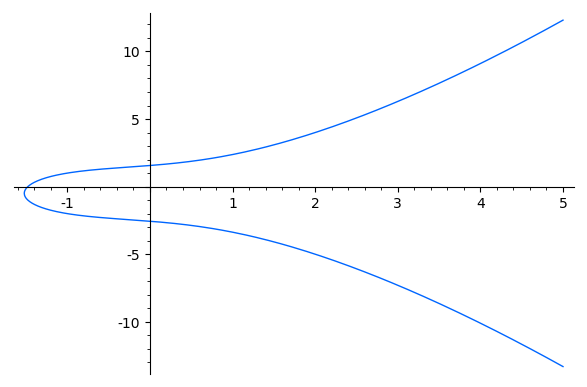

In [44]:
plot(E_Q, (-3, 5), color=hue(0.6))